In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from atlas_topq_2019_23_Limits import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']


pd.set_option('display.max_rows', 20)

In [2]:
data = np.genfromtxt('/home/lessa/Downloads/4data.csv',delimiter=',',skip_header=1)
data = np.array(sorted(data.tolist(), key = lambda pt: pt[0]))
data

array([[3.67119901e+02, 1.18126739e-02],
       [3.95212954e+02, 8.93403517e-03],
       [4.44375773e+02, 5.59211081e-03],
       [5.08989766e+02, 2.84515958e-03],
       [5.87650285e+02, 1.23084959e-03],
       [6.78952636e+02, 4.82237608e-04],
       [7.77278367e+02, 1.71109857e-04],
       [1.36863689e+03, 8.36462560e-06]])

In [8]:
# ### Load CMS data
xsecsObs,sm,covMatrix = read_ATLASdata()
# ### Load LO background from MG5
smLO = getSMLO()
# Get k-factor for each bin
kfac = getKfactor(sm,smLO)
sm = sm/bin_widths

In [9]:
signal = data[:,1]
signal = signal - sm

In [10]:
bin_centers=(atlas_bins[:-1]+atlas_bins[1:])/2

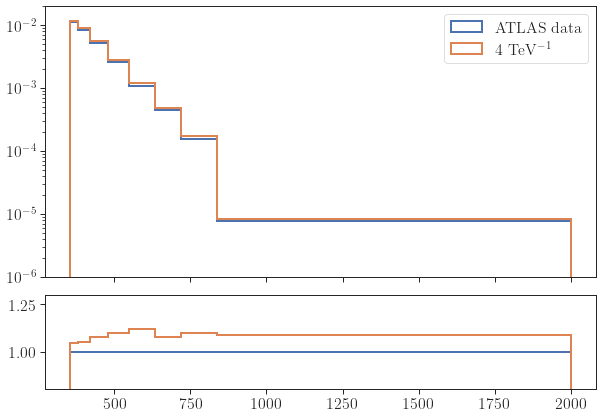

In [11]:
_, axarr = plt.subplots(2,sharex=True, gridspec_kw = {'height_ratios':[2, 0.7]},figsize=(9,7))
plt.subplots_adjust(left=0.12, bottom=0.12, right=0.97, top=None, wspace=None, hspace=0.1)

axarr[0].hist(bin_centers,weights=xsecsObs,label='ATLAS data',histtype='step',linewidth=2,bins=atlas_bins)
axarr[0].hist(bin_centers,weights=sm+signal,label=r'4 TeV$^{-1}$',histtype='step',linewidth=2,bins=atlas_bins)
axarr[0].set_yscale('log')
axarr[0].set_ylim(1e-6,2e-2)
axarr[0].legend()

axarr[1].hist(bin_centers,weights=np.divide(xsecsObs,xsecsObs),histtype='step',linewidth=2,bins=atlas_bins)
axarr[1].hist(bin_centers,weights=np.divide(sm+signal,xsecsObs),histtype='step',linewidth=2,bins=atlas_bins)
axarr[1].set_ylim(0.8,1.3)
plt.show()

In [14]:
sigg = np.array([3.05662421e-06, 2.31550010e-06, 1.44908334e-06, 7.41189353e-07, 3.17836974e-07, 1.21117828e-07, 4.10799094e-08, 1.72852629e-09])
print(sm)
print(xsecsObs)
res  = getUL(signal,sm,xsecsObs,covMatrix)
# yDM95 = res['yDM95']
# chi2min = res['chi2min']
print(res)

[1.16790403e-02 8.82351513e-03 5.49061028e-03 2.77538181e-03
 1.21123052e-03 4.75281936e-04 1.68215336e-04 8.18817615e-06]
[1.129501e-02 8.518551e-03 5.196489e-03 2.585358e-03 1.099220e-03
 4.466096e-04 1.558704e-04 7.694208e-06]
{'yDMmin': array([0.]), 'chi2min': 10.139227277087516, 'yDM95': 0.7726472085201274, 'deltaChi95': 3.8399999999999874}


In [19]:
yDMvals = np.linspace(0.,0.5,200)
deltas = 0.0
c2 = np.array([chi2(y, signal, sm, xsecsObs, covMatrix, deltas) for y in yDMvals])

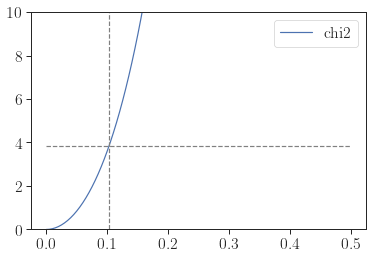

In [20]:
plt.plot(yDMvals,c2-chi2min,label='chi2')
plt.hlines(y=3.84,xmin=yDMvals.min(),xmax=yDMvals.max(),linestyles='dashed',colors='gray')
plt.vlines(x=yDM95,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
# plt.vlines(x=yDM95b,ymin=0,ymax=10.,linestyles='dashed',colors='gray')
plt.legend()
plt.ylim(0,10)
plt.show()